In [1]:
import django_pandas.io as djpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
%matplotlib inline

plt.style.use('bmh')

from space.views import get_openings_df

In [2]:
db_df = get_openings_df(time__gte="2013-01-01")

/home/titou/UrLab/incubator/ve3/lib/python3.4/site-packages/django/db/models/fields/__init__.py:1474: RuntimeWarning: DateTimeField SpaceStatus.time received a naive datetime (2013-01-01 00:00:00) while time zone support is active.
  RuntimeWarning)



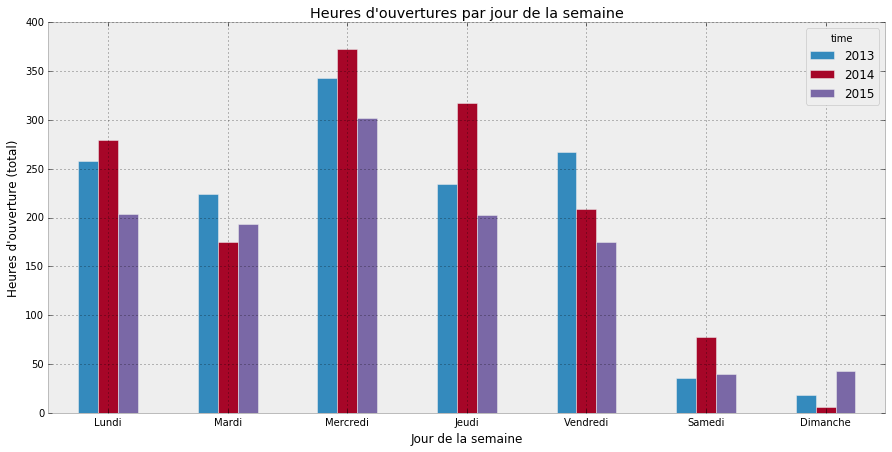

In [3]:
df = db_df.groupby([db_df.time.dt.weekday, db_df.time.dt.year]).is_open.sum().unstack().fillna(0).plot(kind='bar', figsize=(15, 7))
plt.title("Heures d'ouvertures par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Heures d'ouverture (total)")
plt.xticks(range(7), ["Lundi", "Mardi", "Mercredi", "Jeudi", "Vendredi", "Samedi", "Dimanche"], rotation=0)
plt.show()

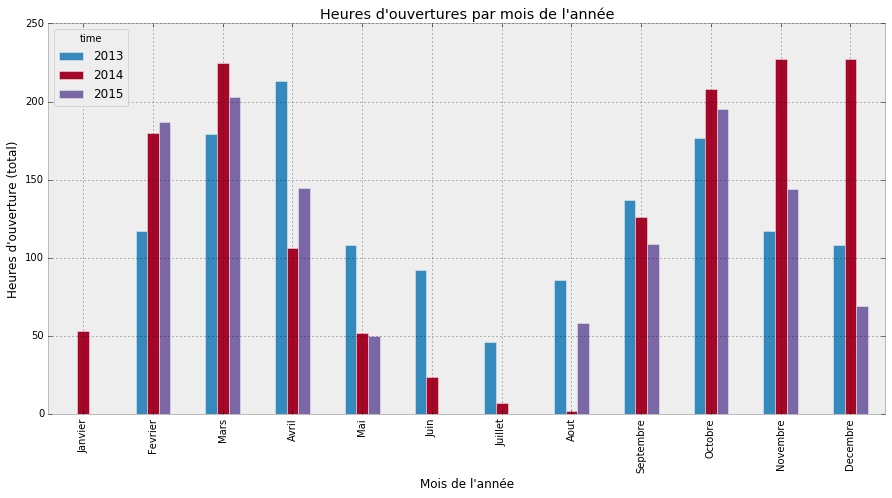

In [4]:
df = db_df.groupby([db_df.time.dt.month, db_df.time.dt.year]).is_open.sum().unstack().fillna(0).plot(kind='bar', figsize=(15, 7))
plt.title("Heures d'ouvertures par mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel("Heures d'ouverture (total)")
plt.xticks(range(12), ["Janvier", "Fevrier", "Mars", "Avril", "Mai", "Juin",
                       "Juillet", "Aout", "Septembre", "Octobre", "Novembre", "Decembre"])
plt.show()

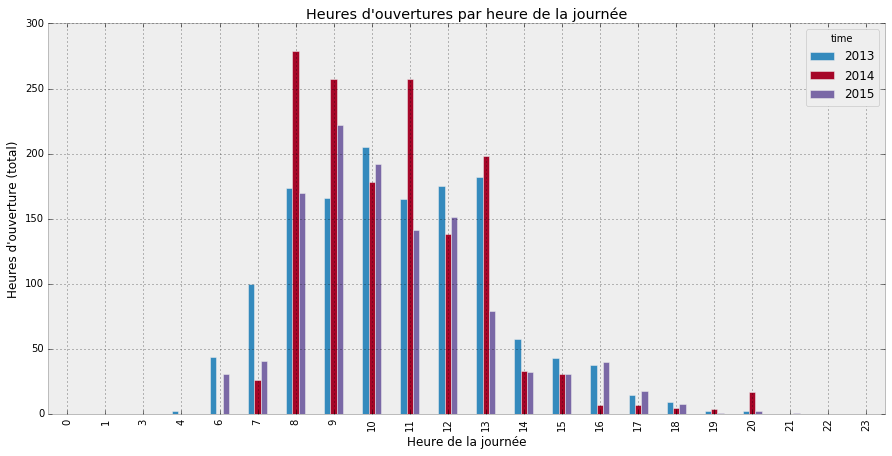

In [5]:
db_df.groupby([db_df.time.dt.hour, db_df.time.dt.year]).is_open.sum().unstack().fillna(0).plot(kind='bar', figsize=(15, 7))
plt.title("Heures d'ouvertures par heure de la journée")
plt.xlabel("Heure de la journée")
plt.ylabel("Heures d'ouverture (total)")
plt.show()

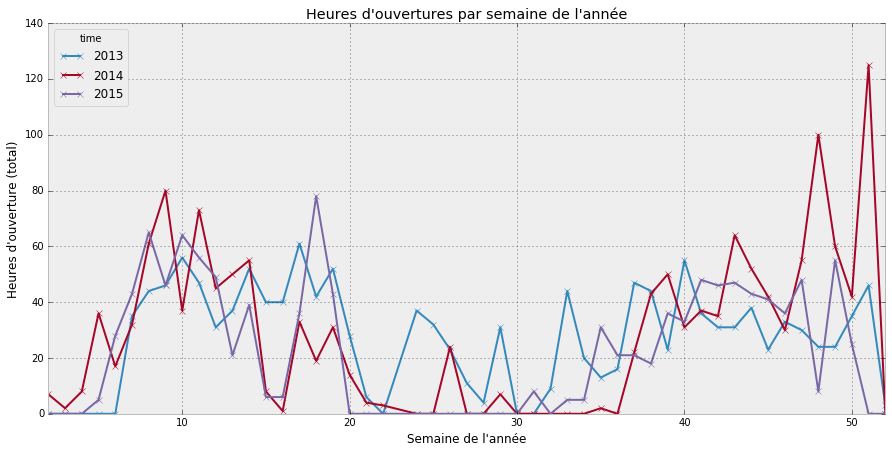

In [6]:
db_df.groupby([db_df.time.dt.week, db_df.time.dt.year]).is_open.sum().unstack().fillna(0).plot(figsize=(15, 7), marker='x')
plt.title("Heures d'ouvertures par semaine de l'année")
plt.xlabel("Semaine de l'année")
plt.ylabel("Heures d'ouverture (total)")
plt.show()

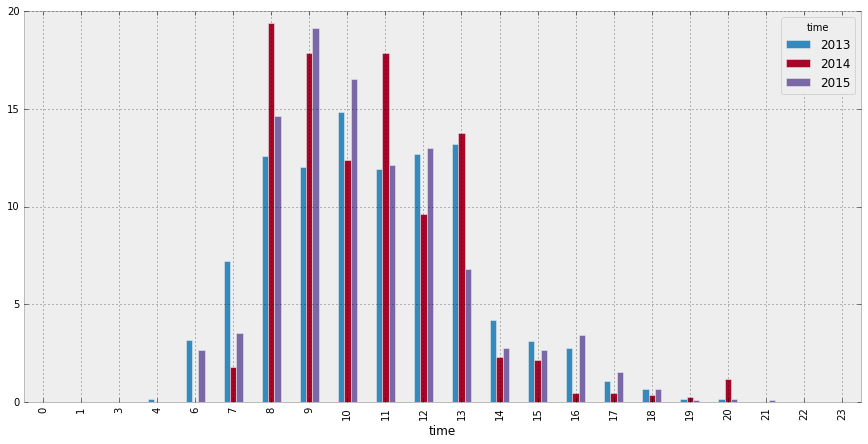

In [7]:
t = db_df.groupby([db_df.time.dt.hour, db_df.time.dt.year]).is_open.sum().unstack().fillna(0)
(100*t/t.sum()).plot(kind='bar', figsize=(15, 7))